In [1]:
import warnings
import numpy as np
import matplotlib.pyplot as plt
import requests
from PIL import Image
from io import BytesIO
from lang_sam import LangSAM
import os
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
from torchvision import transforms
from torch.utils.data import DataLoader
from tqdm import tqdm
from lang_sam.utils import display_coins_with_boxes, find_coin_masks, find_boundary_of_coin, generate_coin_images
from coin_estimator.model import CoinClassifier
device = torch.device("mps")

/Users/gamze/anaconda3/envs/data_analysis/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
/Users/gamze/anaconda3/envs/data_analysis/lib/python3.9/site-packages/groundingdino/models/GroundingDINO/ms_deform_attn.py:31: UserWarning: Failed to load custom C++ ops. Running on CPU mode Only!
  warnings.warn("Failed to load custom C++ ops. Running on CPU mode Only!")


In [2]:
device = torch.device("mps")
model = torch.load("coin_estimator/checkpoints/coin_estimator_test.pth", map_location=torch.device('mps'))
model.eval()

CoinClassifier(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(64, 128, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
    (3): ReLU()
    (4): Conv2d(128, 256, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
    (5): ReLU()
    (6): Conv2d(256, 512, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
    (7): ReLU()
    (8): Conv2d(512, 512, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
    (9): ReLU()
    (10): Conv2d(512, 1024, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
    (11): ReLU()
    (12): Conv2d(1024, 2048, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
    (13): ReLU()
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=32768, out_features=64, bias=True)
    (2): ReLU()
    (3): Linear(in_features=64, out_features=6, bias=True)
    (4): Softmax(dim=1)
  )
)

In [3]:
image_dir = "assets/coin7.JPG"
coins, boxes = generate_coin_images(image_dir)
predictions = []
for coin in coins:
    coin_normalized= (((coin-coin.min())/coin.max())-0.5)*2
    coin_normalized = np.transpose(coin_normalized,(2,0,1))
    coin_normalized = np.expand_dims(coin_normalized,0).astype(np.float32)
    coin_tensor = torch.from_numpy(coin_normalized)
    outputs = model(coin_tensor.to(device))
    _, prediction = torch.max(outputs.data, 1)  # Get index of max value
    predictions.append(prediction)
    print("coin estimated")

final text_encoder_type: bert-base-uncased


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertModel: ['cls.seq_relationship.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.dense.bias', 'cls.predictions.bias', 'cls.seq_relationship.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.dense.weight']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


Model loaded from /Users/gamze/.cache/huggingface/hub/models--ShilongLiu--GroundingDINO/snapshots/a94c9b567a2a374598f05c584e96798a170c56fb/groundingdino_swinb_cogcoor.pth 
 => _IncompatibleKeys(missing_keys=[], unexpected_keys=['label_enc.weight'])
coin estimated
coin estimated
coin estimated
coin estimated
coin estimated
coin estimated
coin estimated
coin estimated
coin estimated
coin estimated
coin estimated
coin estimated
coin estimated
coin estimated
coin estimated
coin estimated
coin estimated
coin estimated
coin estimated
coin estimated
coin estimated
coin estimated
coin estimated
coin estimated
coin estimated
coin estimated
coin estimated
coin estimated
coin estimated
coin estimated
coin estimated
coin estimated
coin estimated
coin estimated
coin estimated
coin estimated
coin estimated
coin estimated


In [4]:
predictions_np = np.zeros((len(coins)))
for i in range(len(coins)):
    predictions_np[i] = predictions[i].detach().cpu().numpy()
classes = ['10 cents', '1 euro', '20 cents', '2 euros', '50 cents', '5 cents']

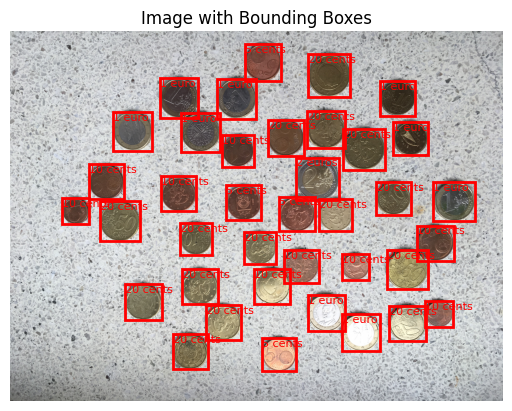

In [5]:
image = Image.open(image_dir).convert("RGB")
display_coins_with_boxes(image, boxes, predictions, classes)

In [35]:
predictions

[tensor([5], device='mps:0'),
 tensor([5], device='mps:0'),
 tensor([0], device='mps:0'),
 tensor([5], device='mps:0'),
 tensor([5], device='mps:0'),
 tensor([5], device='mps:0'),
 tensor([5], device='mps:0'),
 tensor([5], device='mps:0'),
 tensor([5], device='mps:0'),
 tensor([0], device='mps:0'),
 tensor([5], device='mps:0'),
 tensor([5], device='mps:0'),
 tensor([5], device='mps:0'),
 tensor([5], device='mps:0'),
 tensor([5], device='mps:0'),
 tensor([5], device='mps:0'),
 tensor([5], device='mps:0'),
 tensor([5], device='mps:0'),
 tensor([5], device='mps:0'),
 tensor([2], device='mps:0'),
 tensor([5], device='mps:0'),
 tensor([2], device='mps:0'),
 tensor([5], device='mps:0'),
 tensor([0], device='mps:0'),
 tensor([5], device='mps:0'),
 tensor([5], device='mps:0'),
 tensor([2], device='mps:0'),
 tensor([5], device='mps:0'),
 tensor([5], device='mps:0'),
 tensor([5], device='mps:0'),
 tensor([5], device='mps:0'),
 tensor([0], device='mps:0'),
 tensor([5], device='mps:0'),
 tensor([5